# PAIR PROGRAMMING - MODULO 3 - LECCION 09- ESTADISTICA INFERENCIAL

In [42]:
# Importaciones necesarias
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
#import scipy.stats as stats
from scipy.stats import shapiro, kstest, poisson, chisquare, expon
from scipy import stats
from scipy.stats import levene
from scipy.stats import ttest_ind

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Apertura del archivo
df_pair9 = pd.read_csv("world_data_full_apply_nulos.csv", index_col = 0)

1. Evalúa si las siguientes afirmaciones corresponden a una distribución exponencial o poisson:

1.1 ¿El tiempo que transcurre entre la llegada de autobuses a una parada sigue una distribución exponencial o de Poisson?

In [ ]:
# Tiempo entre la llegada de autobuses a una parada: Distribución Exponencial.

1.2 ¿El número de errores en un artículo de noticias sigue una distribución exponencial o de Poisson?

In [ ]:
# Número de errores en un artículo de noticias: Distribución Poisson.

1.3 ¿El tiempo que transcurre entre la llegada de solicitudes de servicio en un restaurante sigue una distribución exponencial o de Poisson?

In [ ]:
# Tiempo entre la llegada de solicitudes de servicio en un restaurante: Distribución Exponencial.

1.4 ¿El número de accidentes de tráfico en una hora en una ciudad sigue una distribución exponencial o de Poisson?

In [ ]:
# Número de accidentes de tráfico en una hora en una cuidad: Distribución Poisson.

1.5 ¿El tiempo entre llegadas de llamadas telefónicas a una central de emergencias sigue una distribución exponencial o de Poisson?

In [ ]:
# Tiempo entre llegadas telefonicas a una central de emergencias: Distribución Exponencial.

1.6 ¿El número de clientes que ingresan a una tienda en una hora sigue una distribución exponencial o de Poisson?

In [ ]:
# Número de clientes que ingresan a una tienda en una hora: Distribución Poisson.

1.7 ¿El tiempo entre llegadas de correos electrónicos en una bandeja de entrada sigue una distribución exponencial o de Poisson?

In [ ]:
# Tiempo entre llegadas de correos electrónicos en una bandeja de entrada: Distribución Exponencial.


1.8 ¿El número de defectos en una línea de producción por día sigue una distribución exponencial o de Poisson?

In [ ]:
# Número de defectos en una línea de producción por día: Distribución Poisson.

1.9 ¿El tiempo que transcurre entre la llegada de taxis en una parada sigue una distribución exponencial o de Poisson?

In [ ]:
# Tiempo que transcurre entre la llegada de taxis en una parada: Distribución Exponencial.

1.10 ¿El número de errores de ortografía en un libro de texto sigue una distribución exponencial o de Poisson?

In [ ]:
# Número de errores de ortografía en un libro de texto: Distribución Poisson.

2. Ejercicios intervalo de confianza. Piensa un motivo por el que sería interesante calcular estos intervalos de confianza para la extracción de insights.

In [3]:
df_pair9.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

2.1. Intervalo de Confianza para la Esperanza de Vida

Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% para la esperanza de vida promedio de cada continente.

Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

In [12]:
for pais in df_pair9["continent"].unique():
    df_continente = df_pair9[df_pair9["continent"] == pais]
    
    # Eliminar filas con valores nulos en la columna 'life_expectancy'
    df_continente_sinnulos = df_continente.dropna(subset=['life_expectancy'])
    
    # Calcular la media y el error estándar en el DataFrame sin valores nulos
    media = df_continente_sinnulos["life_expectancy"].mean()
    error = stats.sem(df_continente_sinnulos["life_expectancy"])

    # Definir el nivel de confianza (95% en este caso)
    nivel_confianza = 0.95

    # Calculamos los grados de libertad de la muestra.
    grados_libertad = len(df_continente_sinnulos["life_expectancy"]) - 1

    # Calcular el valor crítico (utilizando la distribución t de Student)
    valor_critico = stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

    # Calcular el intervalo de confianza
    limite_inferior = media - valor_critico * error
    limite_superior = media + valor_critico * error

    print(f"\nCONTINENTE: {pais}\n")
    print("Intervalo de Confianza:")
    print(f"Media Muestral: {np.round(media, 2)}")
    print(f"Error Estándar: {np.round(error, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza}")
    print(f"Valor Crítico: {np.round(valor_critico, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")



CONTINENTE: Asia

Intervalo de Confianza:
Media Muestral: 73.78
Error Estándar: 0.72
Nivel de Confianza: 0.95
Valor Crítico: 2.02
Intervalo de Confianza: (72.32, 75.24)

CONTINENTE: Europe

Intervalo de Confianza:
Media Muestral: 79.2
Error Estándar: 0.55
Nivel de Confianza: 0.95
Valor Crítico: 2.02
Intervalo de Confianza: (78.09, 80.32)

CONTINENTE: Africa

Intervalo de Confianza:
Media Muestral: 63.72
Error Estándar: 0.83
Nivel de Confianza: 0.95
Valor Crítico: 2.01
Intervalo de Confianza: (62.05, 65.4)

CONTINENTE: Central America

Intervalo de Confianza:
Media Muestral: 74.69
Error Estándar: 0.79
Nivel de Confianza: 0.95
Valor Crítico: 2.09
Intervalo de Confianza: (73.04, 76.34)

CONTINENTE: South America

Intervalo de Confianza:
Media Muestral: 74.82
Error Estándar: 0.84
Nivel de Confianza: 0.95
Valor Crítico: 2.18
Intervalo de Confianza: (72.99, 76.64)

CONTINENTE: Oceania

Intervalo de Confianza:
Media Muestral: 71.12
Error Estándar: 1.69
Nivel de Confianza: 0.95
Valor Crítico:

In [ ]:
# Explicación: obtención del calculo de intervalo de confianza para la esperanza de vida de cada continente. Vemos en que continentes la esperaza de vida global presentan un rango más ajustado. 

2.2. Intervalo de Confianza para el PIB

Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes.

In [13]:
for pais in df_pair9["continent"].unique():
    df_continente2 = df_pair9[df_pair9["continent"] == pais]
    
    # Eliminar filas con valores nulos en la columna 'gdp'
    df_continente_sinnulos2 = df_continente2.dropna(subset=['gdp'])
    
    # Calcular la media y el error estándar en el DataFrame sin valores nulos
    media2 = df_continente_sinnulos2["gdp"].mean()
    error2 = stats.sem(df_continente_sinnulos2["gdp"])

    # Definir el nivel de confianza (90% en este caso)
    nivel_confianza2 = 0.90

    # Calculamos los grados de libertad de la muestra.
    grados_libertad2 = len(df_continente_sinnulos2["gdp"]) - 1

    # Calcular el valor crítico (utilizando la distribución t de Student)
    valor_critico2 = stats.t.ppf((1 + nivel_confianza2) / 2, df=grados_libertad2)

    # Calcular el intervalo de confianza
    limite_inferior2 = media2 - valor_critico2 * error2
    limite_superior2 = media2 + valor_critico2 * error2

    print(f"\nCONTINENTE: {pais}\n")
    print("Intervalo de Confianza:")
    print(f"Media Muestral: {np.round(media2, 2)}")
    print(f"Error Estándar: {np.round(error2, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza2}")
    print(f"Valor Crítico: {np.round(valor_critico2, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior2, 2)}, {np.round(limite_superior2, 2)})")


CONTINENTE: Asia

Intervalo de Confianza:
Media Muestral: 837195265650.86
Error Estándar: 463167313346.77
Nivel de Confianza: 0.9
Valor Crítico: 1.68
Intervalo de Confianza: (58578265130.07, 1615812266171.66)

CONTINENTE: Europe

Intervalo de Confianza:
Media Muestral: 486748190304.24
Error Estándar: 124182737782.55
Nivel de Confianza: 0.9
Valor Crítico: 1.68
Intervalo de Confianza: (278192298911.51, 695304081696.97)

CONTINENTE: Africa

Intervalo de Confianza:
Media Muestral: 46080559143.87
Error Estándar: 12052560395.91
Nivel de Confianza: 0.9
Valor Crítico: 1.67
Intervalo de Confianza: (25896266980.48, 66264851307.25)

CONTINENTE: Central America

Intervalo de Confianza:
Media Muestral: 88479927703.1
Error Estándar: 62002880448.04
Nivel de Confianza: 0.9
Valor Crítico: 1.73
Intervalo de Confianza: (-18731287288.44, 195691142694.64)

CONTINENTE: South America

Intervalo de Confianza:
Media Muestral: 298433685548.77
Error Estándar: 136724518484.96
Nivel de Confianza: 0.9
Valor Crític

In [ ]:
# Explicación: observamos que continentes tienen menos variaciones en el PIB. Es decir, su intervalo de confianza presenta un menor rango. 

2.3.Intervalo de Confianza para la Tasa de Natalidad

Contexto: Trabajas en una agencia gubernamental que se ocupa de cuestiones demográficas y deseas determinar el intervalo de confianza al 99% para la tasa de natalidad promedio en Asia.

In [18]:
df_continente3 = df_pair9[df_pair9["continent"] == "Asia"]

# Eliminar filas con valores nulos en la columna 'birth_rate'
df_continente_sinnulos3 = df_continente3.dropna(subset=['birth_rate'])

# Calcular la media y el error estándar en el DataFrame sin valores nulos
media3 = df_continente_sinnulos3["birth_rate"].mean()
error3 = stats.sem(df_continente_sinnulos3["birth_rate"])

# Definir el nivel de confianza (99% en este caso)
nivel_confianza3 = 0.99

# Calculamos los grados de libertad de la muestra.
grados_libertad3 = len(df_continente_sinnulos3["birth_rate"]) - 1

# Calcular el valor crítico (utilizando la distribución t de Student)
valor_critico3 = stats.t.ppf((1 + nivel_confianza3) / 2, df=grados_libertad3)

# Calcular el intervalo de confianza
limite_inferior3 = media3 - valor_critico3 * error3
limite_superior3 = media3 + valor_critico3 * error3

print("Intervalo de Confianza:")
print(f"Media Muestral: {np.round(media3, 2)}")
print(f"Error Estándar: {np.round(error3, 2)}")
print(f"Nivel de Confianza: {nivel_confianza3}")
print(f"Valor Crítico: {np.round(valor_critico3, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior3, 2)}, {np.round(limite_superior3, 2)})")

Intervalo de Confianza:
Media Muestral: 18.81
Error Estándar: 0.99
Nivel de Confianza: 0.99
Valor Crítico: 2.7
Intervalo de Confianza: (16.14, 21.48)


In [ ]:
# Explicación: observamos que en Asia el número de nacimiento por cada 1000 habitantes por año, esta en un rango de 16.14 y 21.48.
# El intervalo de confianza para la variable en cuestión, con un nivel de confianza del 99%, es de 16.14 a 21.48.
# Esto indica que hay un 99% de probabilidad de que el verdadero valor de la variable esté dentro de este rango. Es una estimación de la precisión de la media muestral, donde el valor medio observado fue de 18.81.


2.4. Intervalo de Confianza para la Tasa de Desempleo

Contexto: Eres un analista de políticas públicas y deseas calcular el intervalo de confianza al 95% para la tasa de desempleo promedio en los países de Oceanía.

In [26]:
df_continente4 = df_pair9[df_pair9["continent"] == "Oceania"]

# Eliminar filas con valores nulos en la columna 'birth_rate'
df_continente_sinnulos4 = df_continente4.dropna(subset=['unemployment_rate'])

# Calcular la media y el error estándar en el DataFrame sin valores nulos
media_4 = df_continente_sinnulos4["unemployment_rate"].mean()
error4 = stats.sem(df_continente_sinnulos4["unemployment_rate"])

# Definir el nivel de confianza (95% en este caso)
nivel_confianza4 = 0.95

# Calculamos los grados de libertad de la muestra.
grados_libertad4 = len(df_continente_sinnulos4["unemployment_rate"]) - 1

# Calcular el valor crítico (utilizando la distribución t de Student)
valor_critico4 = stats.t.ppf((1 + nivel_confianza4) / 2, df=grados_libertad4)

# Calcular el intervalo de confianza
limite_inferior4 = media_4 - valor_critico4 * error4
limite_superior4 = media_4 + valor_critico4 * error4

print("Intervalo de Confianza de Oceania:")
print(f"Media Muestral: {np.round(media_4, 2)}")
print(f"Error Estándar: {np.round(error4, 2)}")
print(f"Nivel de Confianza: {nivel_confianza4}")
print(f"Valor Crítico: {np.round(valor_critico4, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior4, 2)}, {np.round(limite_superior4, 2)})")

Intervalo de Confianza de Oceania:
Media Muestral: 3.79
Error Estándar: 0.87
Nivel de Confianza: 0.95
Valor Crítico: 2.36
Intervalo de Confianza: (1.73, 5.86)


In [ ]:
# Explicación: El intervalo de confianza para la tasa de desempleo en Oceanía, con un nivel de confianza del 95%, es de 1.73% a 5.86%.
# Esto significa que hay un 95% de probabilidad de que la verdadera tasa de desempleo de Oceanía esté dentro de este rango. 

2.5. Intervalo de Confianza para la Tasa de Impuestos

Contexto: Trabajas en un ministerio de finanzas y deseas estimar el intervalo de confianza al 90% para la tasa de impuestos promedio en los países de África.

In [27]:
df_continente5 = df_pair9[df_pair9["continent"] == "Africa"]

# Eliminar filas con valores nulos en la columna 'birth_rate'
df_continente_sinnulos5 = df_continente5.dropna(subset=['total_tax_rate'])

# Calcular la media y el error estándar en el DataFrame sin valores nulos
media5 = df_continente_sinnulos5["total_tax_rate"].mean()
error5 = stats.sem(df_continente_sinnulos5["total_tax_rate"])

# Definir el nivel de confianza (90% en este caso)
nivel_confianza5 = 0.90

# Calculamos los grados de libertad de la muestra.
grados_libertad5 = len(df_continente_sinnulos5["total_tax_rate"]) - 1

# Calcular el valor crítico (utilizando la distribución t de Student)
valor_critico5 = stats.t.ppf((1 + nivel_confianza5) / 2, df=grados_libertad5)

# Calcular el intervalo de confianza
limite_inferior5 = media5 - valor_critico5 * error5
limite_superior5 = media5 + valor_critico5 * error5

print("Intervalo de Confianza de Africa:")
print(f"Media Muestral: {np.round(media5, 2)}")
print(f"Error Estándar: {np.round(error5, 2)}")
print(f"Nivel de Confianza: {nivel_confianza5}")
print(f"Valor Crítico: {np.round(valor_critico5, 2)}")
print(f"Intervalo de Confianza: ({np.round(limite_inferior5, 2)}, {np.round(limite_superior5, 2)})")

Intervalo de Confianza de Africa:
Media Muestral: 47.77
Error Estándar: 4.04
Nivel de Confianza: 0.9
Valor Crítico: 1.68
Intervalo de Confianza: (41.0, 54.54)


In [ ]:
# Explicación: El intervalo de confianza para la tasa de impuestos en África, con un nivel de confianza del 90%, es de 41.0% a 54.54%.
# Esto significa que hay un 90% de probabilidad de que la verdadera tasa de impuestos de África esté dentro de este rango. 

3. Ejercicios prueba de hipótesis: Tienes que pensar en 2 hipótesis que quieras aceptar o rechazar usando una prueba de hipótesis en base a los datos que tenemos.

In [ ]:
# Hipótesis 1:
# Contexto: Quieres determinar si la tasa de impuestos difiere entre los continentes de Europa y Asia.
# Esto es relevante para entender las diferencias en las políticas fiscales y la carga tributaria entre las regiones, lo que puede tener implicaciones significativas en términos de desarrollo económico, inversión empresarial y bienestar social.

# Hipótesis nula (H0): La tasa de impuestos es la misma en Europa y Asia.
# Hipótesis alternativa (H1): La tasa de impuestos difiere entre Europa y Asia.

In [44]:
# Resolución mediante la prueba t de Student. 
def prueba_hipotesis(*args):
    # Verificar si las varianzas son iguales
    if len(args) == 2:
        p_value_varianza = stats.levene(*args, center="median")[1]
    else:
        p_value_varianza = stats.bartlett(*args)[1]
    
    # Realizar la prueba t de Student
    if p_value_varianza > 0.05:
        t_stat, p_value = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_value = stats.ttest_ind(*args, equal_var=False)
    
    # Nivel de significancia (alfa)
    alpha = 0.05

    # Comparar p-value con alfa
    if p_value < alpha:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa entre los grupos.")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa entre los grupos.")

# Hipótesis 1: Comparación de tasas de impuestos entre Europa y Asia
tasas_europa = df_pair9[df_pair9["continent"] == "Europe"]["total_tax_rate"]
tasas_asia = df_pair9[df_pair9["continent"] == "Asia"]["total_tax_rate"]
print("Hipótesis 1:")
prueba_hipotesis(tasas_europa, tasas_asia)


Hipótesis 1:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los grupos.


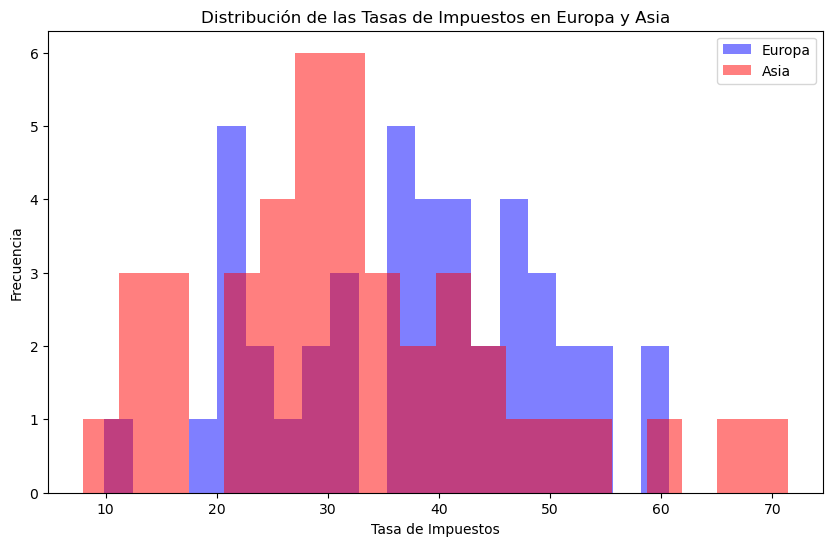

In [45]:
# Histogramas de las tasas de impuestos en Europa y Asia
plt.figure(figsize=(10, 6))
plt.hist(df_europe, bins=20, alpha=0.5, label='Europa', color='blue')
plt.hist(df_asia, bins=20, alpha=0.5, label='Asia', color='red')
plt.xlabel('Tasa de Impuestos')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Tasas de Impuestos en Europa y Asia')
plt.legend()
plt.show()

In [46]:
# Resolución: Hipótesis 1: Comparación de tasas de impuestos entre Europa y Asia
# Prueba de normalidad: Usaremos el test de Shapiro-Wilk para evaluar si las tasas de impuestos en Europa y Asia siguen una distribución normal.
# Obtener las tasas de impuestos para Europa y Asia
tasas_europa = df_pair9[df_pair9["continent"] == "Europe"]["total_tax_rate"]
tasas_asia = df_pair9[df_pair9["continent"] == "Asia"]["total_tax_rate"]

# Realizar la prueba de Shapiro-Wilk para Europa
stat_europa, p_value_europa = shapiro(tasas_europa)

print("Shapiro-Wilk para tasas de impuestos en Europa:")
print(f"Estadística de prueba: {stat_europa}")
print(f"Valor p: {p_value_europa}")

# Realizar la prueba de Shapiro-Wilk para Asia
stat_asia, p_value_asia = shapiro(tasas_asia)
print("Shapiro-Wilk para tasas de impuestos en Asia:")
print(f"Estadística de prueba: {stat_asia}")
print(f"Valor p: {p_value_asia}")

Shapiro-Wilk para tasas de impuestos en Europa:
Estadística de prueba: nan
Valor p: 1.0
Shapiro-Wilk para tasas de impuestos en Asia:
Estadística de prueba: nan
Valor p: 1.0


In [47]:
# Prueba de igualdad de varianzas: Utilizaremos la prueba de Levene para verificar si las varianzas de las tasas de impuestos en Europa y Asia son iguales.
stat_varianzas, p_value_varianzas = levene(tasas_europa, tasas_asia)
print("Prueba de Levene para igualdad de varianzas:")
print(f"Estadística de prueba: {stat_varianzas}")
print(f"Valor p: {p_value_varianzas}")

Prueba de Levene para igualdad de varianzas:
Estadística de prueba: nan
Valor p: nan


In [48]:
# Prueba de comparación de medias: Dependiendo del resultado de la prueba de igualdad de varianzas, utilizaremos la prueba t de Welch o la prueba t de Student para comparar las medias de las tasas de impuestos entre Europa y Asia.
# Realizar la prueba t de Student para comparar las medias de las tasas de impuestos
t_stat, p_value = ttest_ind(tasas_europa, tasas_asia, equal_var=True)

print("Prueba t para comparar las medias de las tasas de impuestos entre Europa y Asia:")
print(f"Estadística de prueba (t): {t_stat}")
print(f"Valor p: {p_value}")

Prueba t para comparar las medias de las tasas de impuestos entre Europa y Asia:
Estadística de prueba (t): nan
Valor p: nan


In [ ]:
# Hipótesis 2:
# Contexto: Saber la población para cada idioma.
# Estás interesado en saber si hay diferencias significativas en la población para cada idioma. Esto podría ser relevante en diversos campos, como la lingüística, la planificación urbana, la educación y la formulación de políticas de inmigración.
# Conocer las diferencias en la población para cada idioma puede ayudar a informar estrategias de comunicación, programas de enseñanza de idiomas y políticas de integración cultural.
# Hipótesis nula (H0): La población para cada idioma es la misma.
# Hipótesis alternativa (H1): La población para al menos un idioma es diferente.